In [1]:
import datetime
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pathlib import Path
import tables
from tqdm import tqdm
#%matplotlib inline
import random
import math


In [2]:
df = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
print('done all data')

done all data


In [9]:
df1 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\sine_gratings_8_directions\data_preprocessed.hdf5")
df2 = pd.read_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed.hdf5")

#frames = [df1, df2]
#result = pd.concat(frames)
#result.to_hdf(r"C:\Users\ag-bahl\Desktop\plaids\data_preprocessed_concat.hdf5", key="all_events", complevel=9)

In [13]:
# from result we exclude all bouts with abs value smaller than
frames = [df1, df2]
result = pd.concat(frames)

In [14]:
ls = result['stimulus_name'].unique().tolist()

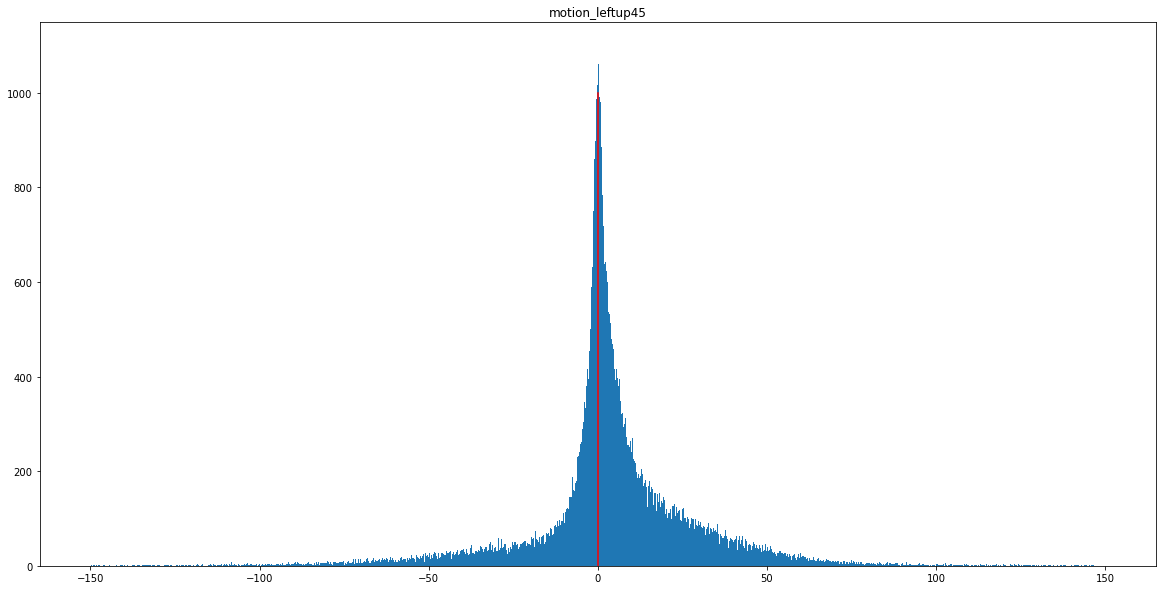

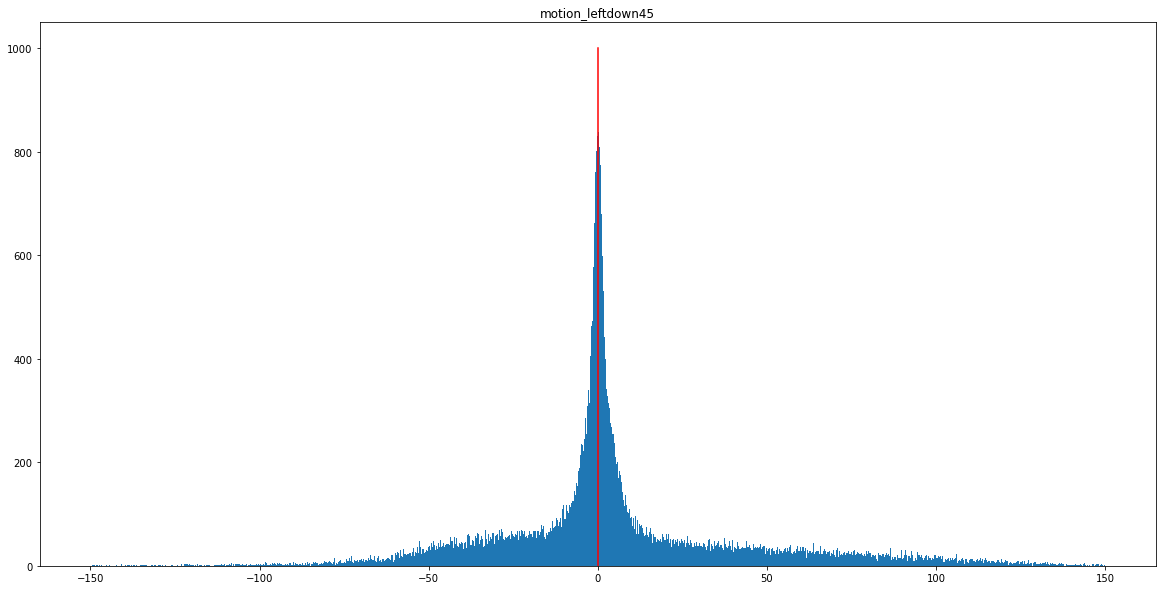

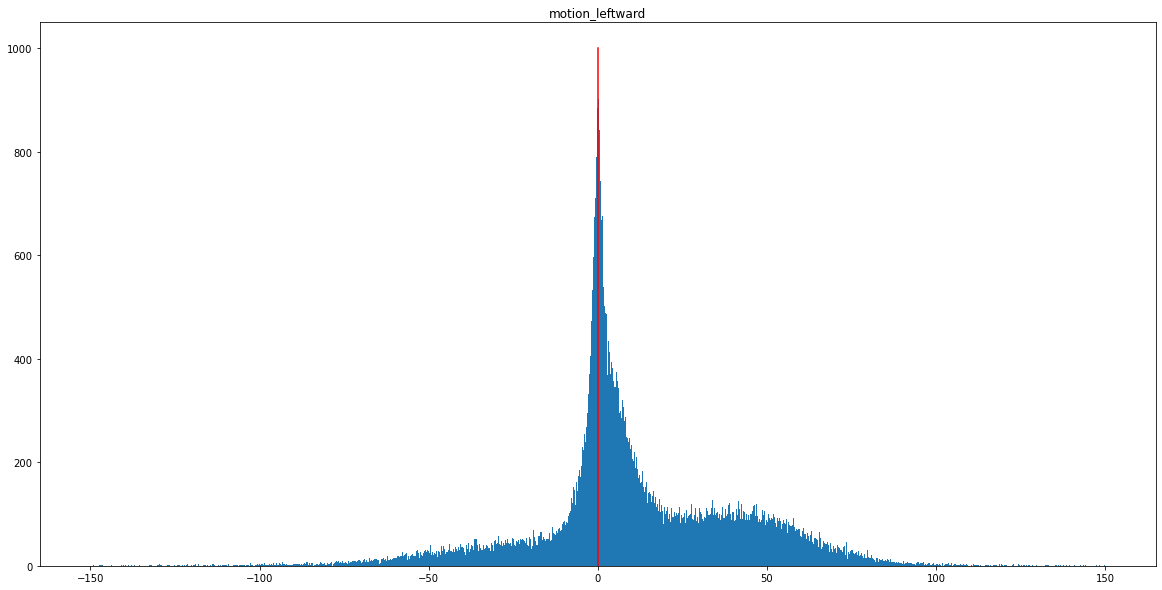

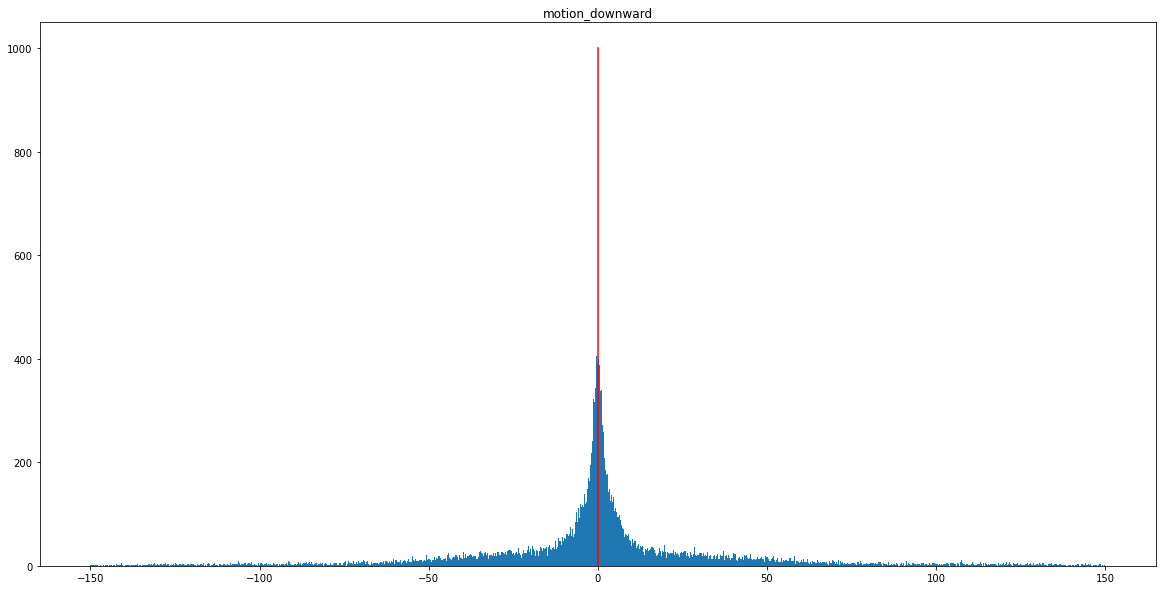

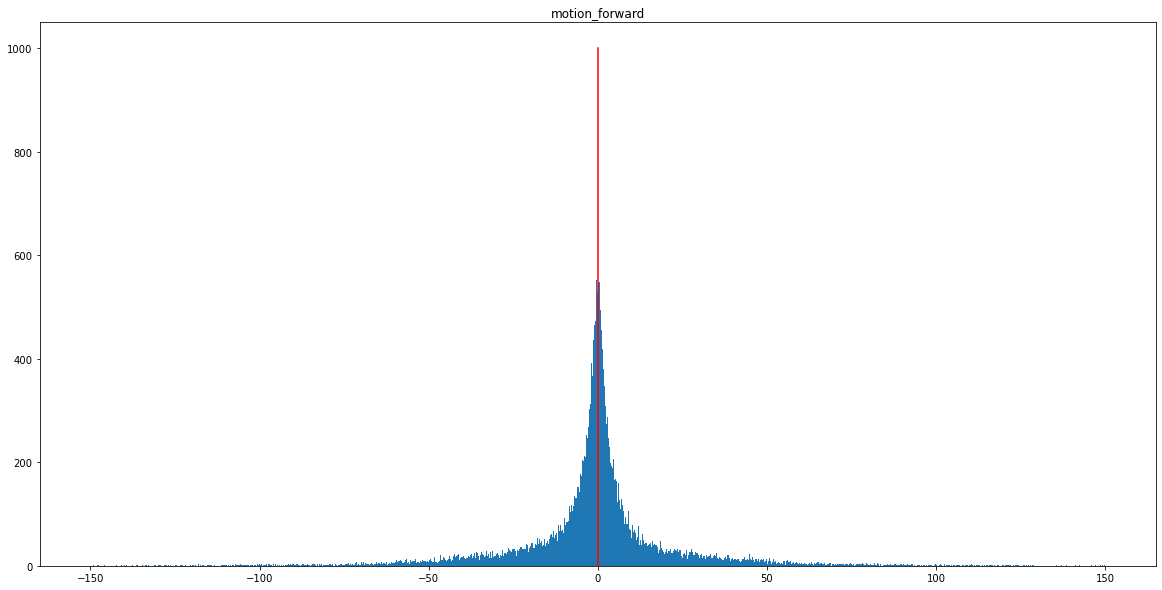

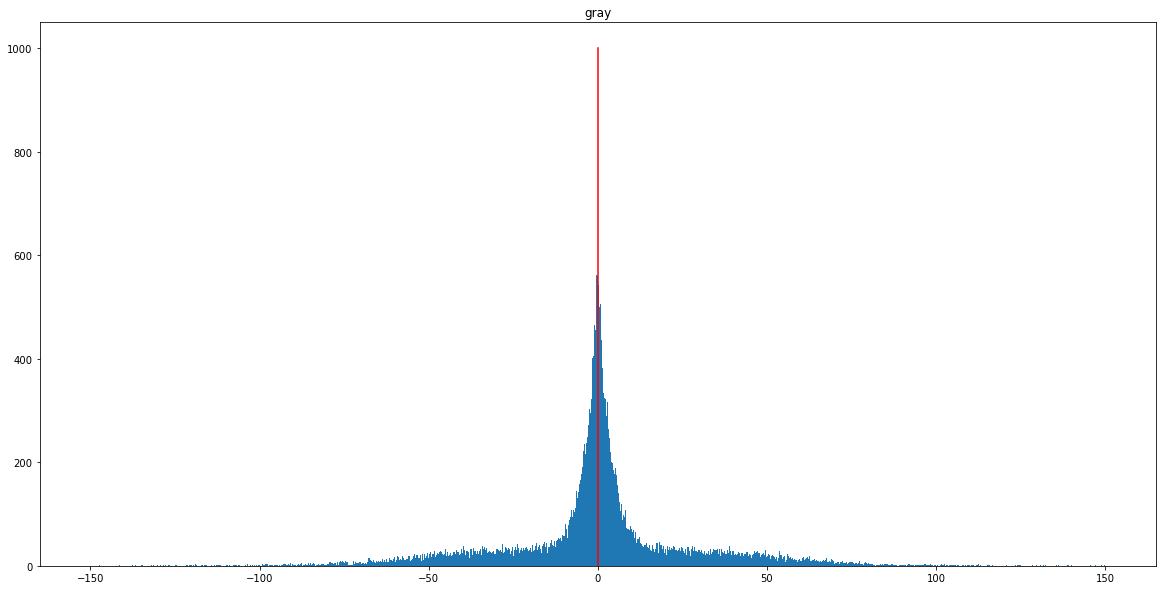

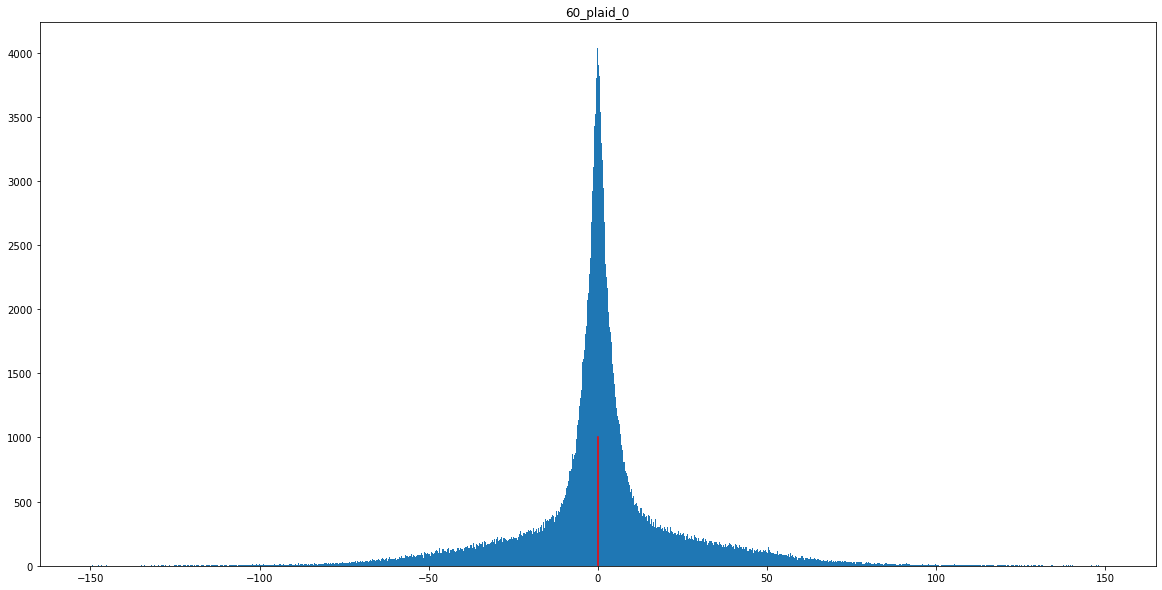

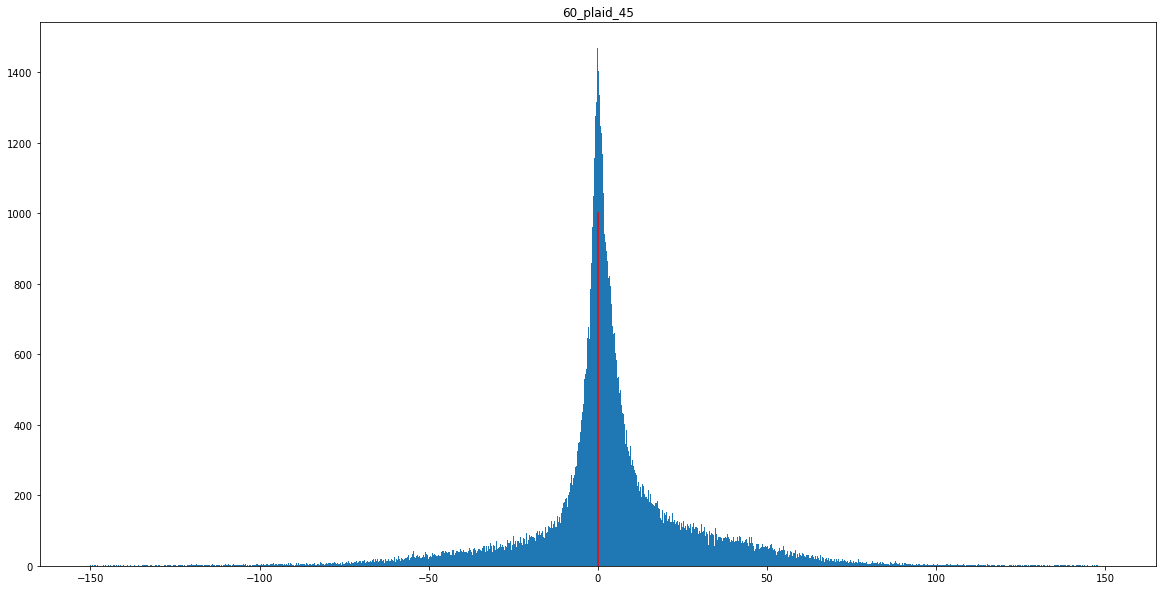

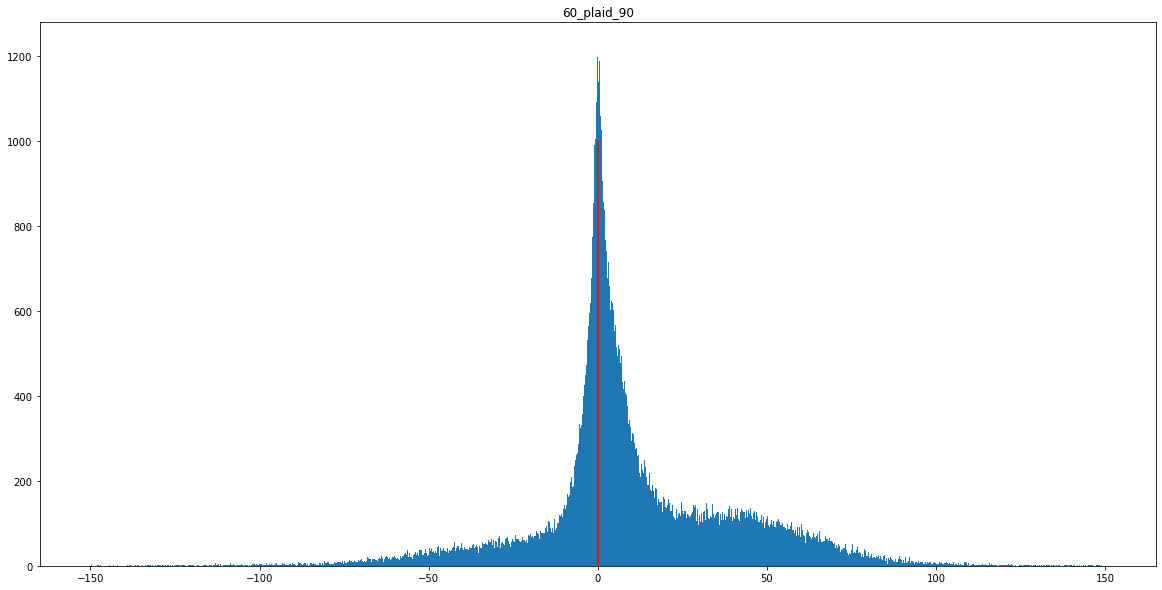

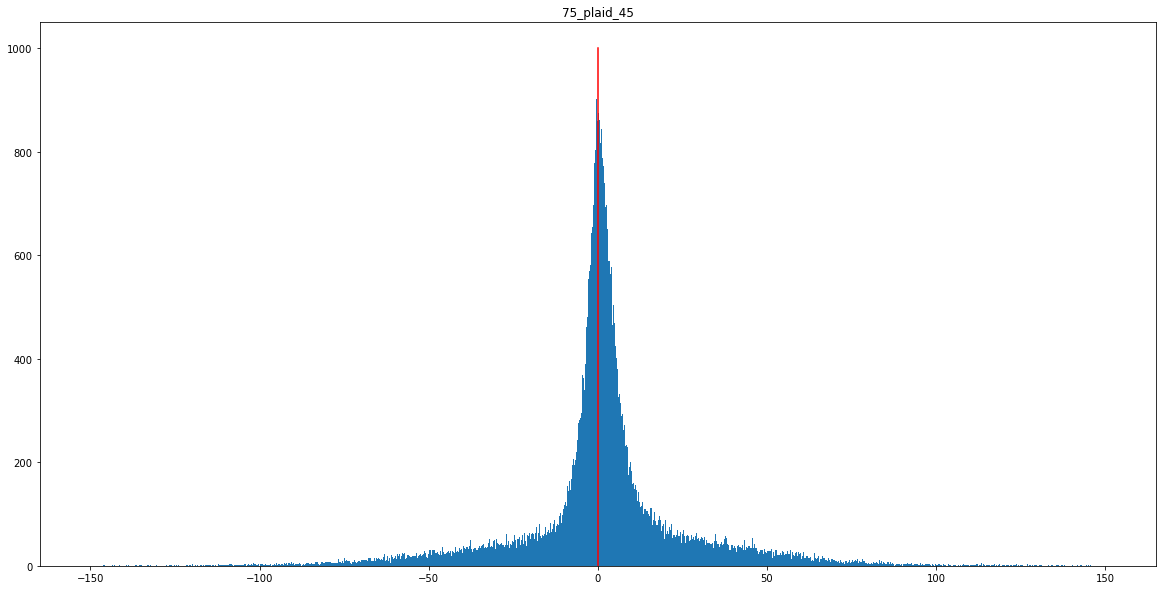

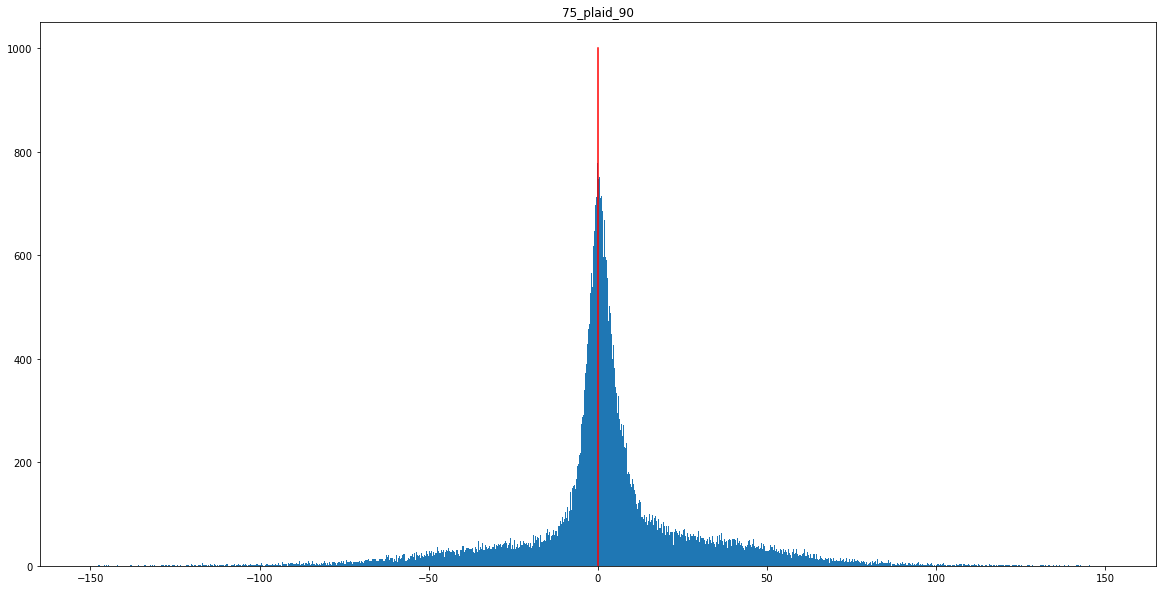

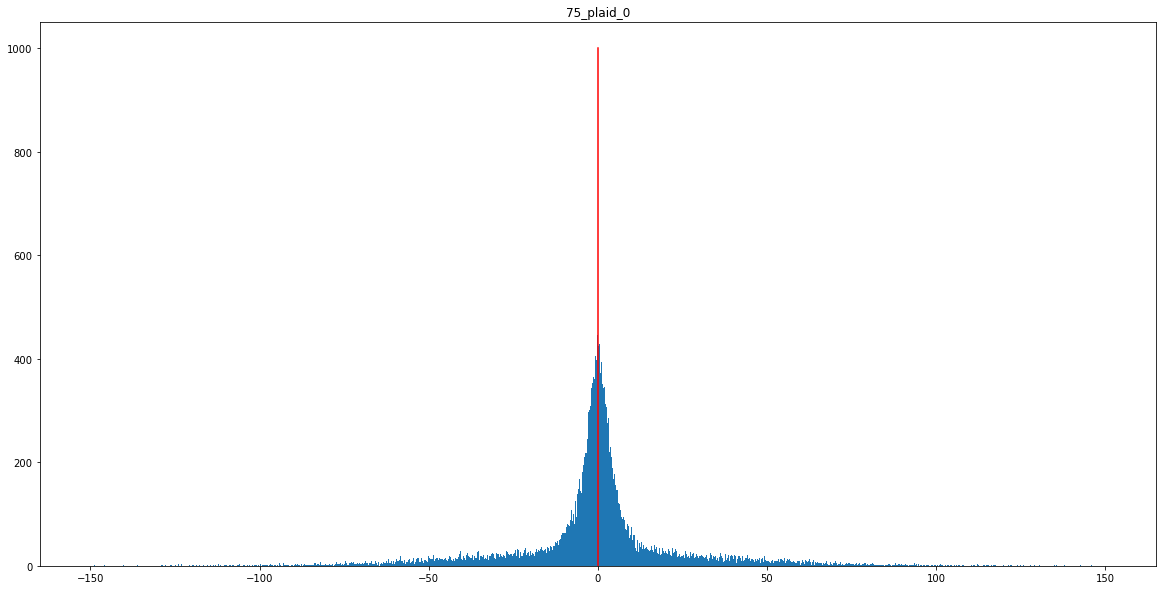

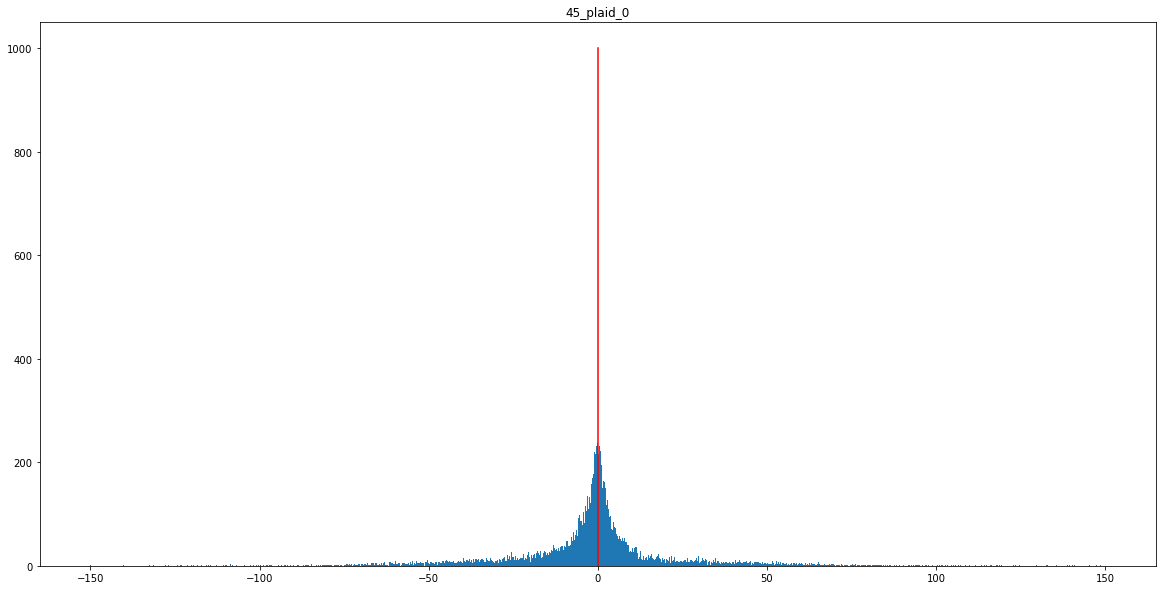

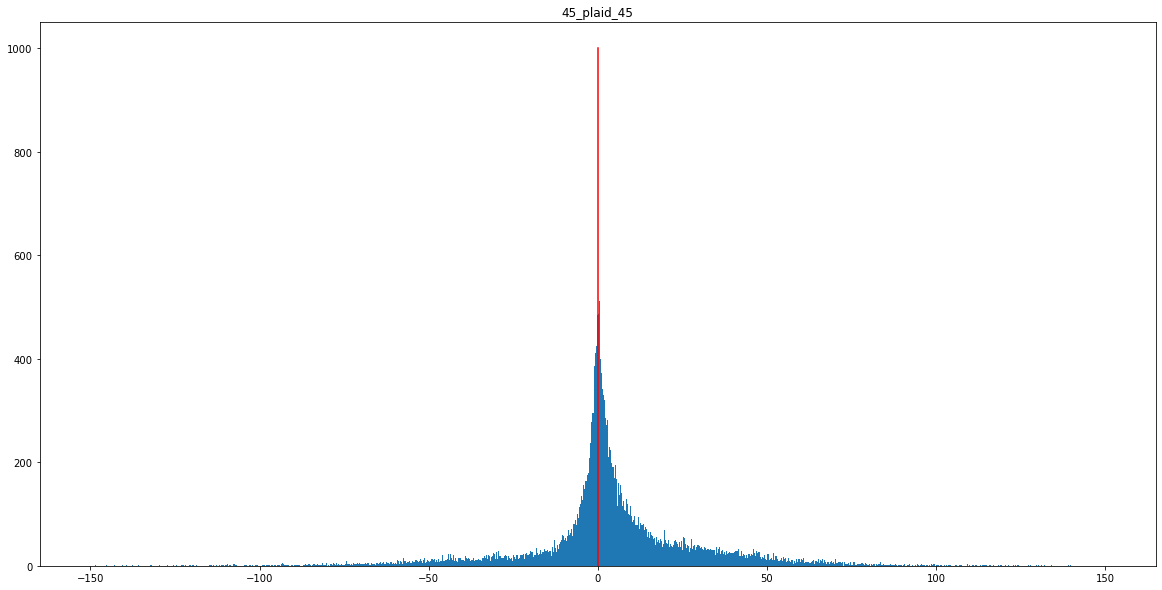

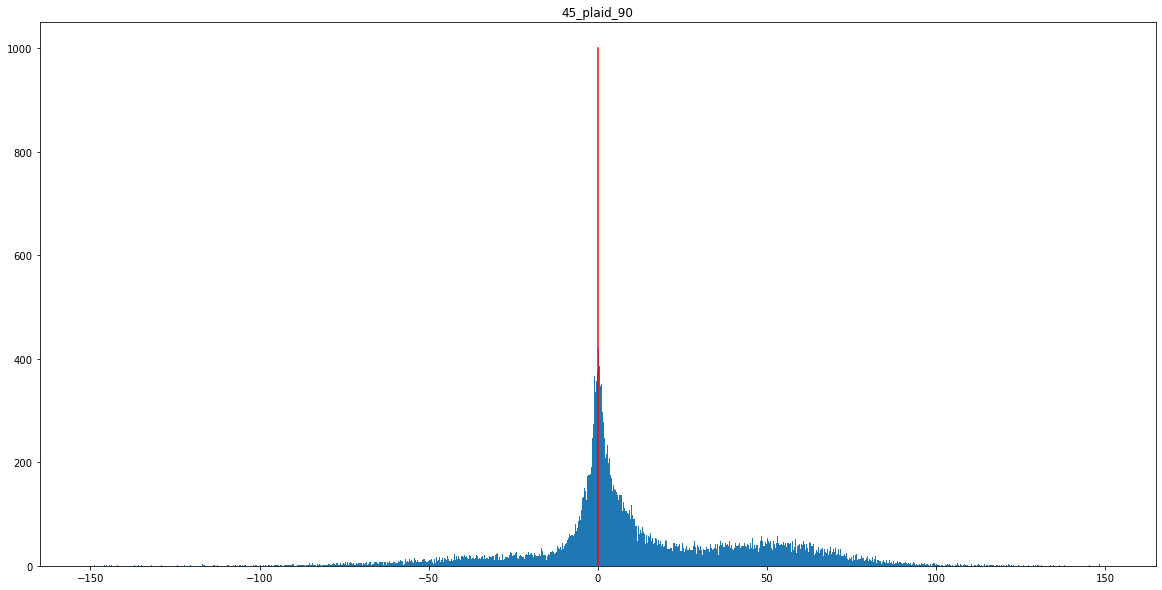

In [24]:
plt.rcParams["figure.figsize"] = (20, 10)

for stim in ls:
    sub = result[result['stimulus_name']== stim]
    plt.hist(sub['estimated_orientation_change'],bins = np.arange(-150,150,0.1))
    plt.plot([0,0],[0,1000],color = 'red')
    plt.title(stim)
    plt.show()